In [329]:
import pandas as pd, numpy as np, seaborn as sns
from datetime import datetime


%matplotlib inline

## Team Alpha Drone

Since the API from `api.dronestre.am` provides data on drone strikes in near real time, this **might** be useful to hold President Obama accountable to his promise of reducing drone strikes.  Your mission, is to explore drone strike data, doing any accomanying research with your analysis, and report back any good summary statistics.

Also, we would like to know:
 - Is this a good source of data?
     - Why / why not?
     
*Politics aside -- let's keep it to what is measurable in our dataset.  This isn't meant to prove or disprove anything.  It's a **fun** dataset to look at moreso than a motivator of political discourse.*

In [330]:
# First we need to fetch some data using Python requests from API
# Read more about Python requests:
# http://docs.python-requests.org/en/master/user/quickstart/

import requests

response = requests.get("http://api.dronestre.am/data")
json_data = response.json()
drone_df = pd.DataFrame(json_data['strike'])

In [331]:
drone_df.head()

,_id,articles,bij_link,bij_summary_short,bureau_id,children,civilians,country,date,deaths,...,injuries,lat,location,lon,names,narrative,number,target,town,tweet_id
0,55c79e711cbee48856a30886,[],http://www.thebureauinvestigates.com/2012/03/2...,In the first known US targeted assassination u...,YEM001,,0,Yemen,2002-11-03T00:00:00.000Z,6,...,,15.47467,Marib Province,45.322755,"[Qa'id Salim Sinan al-Harithi, Abu Ahmad al-Hi...",In the first known US targeted assassination u...,1,,,278544689483890688
1,55c79e711cbee48856a30887,[],http://www.thebureauinvestigates.com/2011/08/1...,First known drone strike in Pakistan kills at ...,B1,2,2,Pakistan,2004-06-17T00:00:00.000Z,6-8,...,1,32.30512565,South Waziristan,69.57624435,"[Nek Mohammad, Fakhar Zaman, Azmat Khan, Marez...",The first known fatal US drone strike inside P...,2,Nek Mohammed,Wana,278544750867533824
2,55c79e711cbee48856a30888,[],http://www.thebureauinvestigates.com/2011/08/1...,"Two killed, including Haitham al-Yemeni an al ...",B2,,,Pakistan,2005-05-08T00:00:00.000Z,2,...,,32.98677989,North Waziristan,70.26082993,"[Haitham al-Yemeni, Samiullah Khan]",2 people killed in a Predator strike which rep...,3,Haitham al-Yemeni,Toorikhel,278544812255367168
3,55c79e721cbee48856a30889,[],http://www.thebureauinvestigates.com/2011/08/1...,"Failed strike against Abu Hamza Rabia (""al Qae...",B3,3,3-8,Pakistan,2005-11-05T00:00:00.000Z,8,...,1,32.99988191,North Waziristan,70.34082413,[],A failed strike destroyed Abu Hamza Rabia's ho...,4,Abu Hamza Rabia,Mosaki,278544854483628032
4,55c79e721cbee48856a3088a,[],http://www.thebureauinvestigates.com/2011/08/1...,"Syrian Abu Hamza Rabia, the senior al Qaeda op...",B4,2,2,Pakistan,2005-12-01T00:00:00.000Z,5,...,,33.00866349,North Waziristan,70.04196167,"[Abu Hamza Rabia, Suleiman al-Moghrabi, Amer A...","5 people were killed, including 2 children, wh...",5,Abu Hamza Rabia,Haisori,278544895789133825


In [332]:
drone_df.to_csv('drone.csv', header=True, index=False, encoding='utf-8') #Export to Excel

In [333]:
df = drone_df
drone_df.describe()

,number
count,629.00000
mean,315.00000
std,181.72094
min,1.00000
25%,158.00000
50%,315.00000
75%,472.00000
max,629.00000


In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 22 columns):
_id                  629 non-null object
articles             629 non-null object
bij_link             629 non-null object
bij_summary_short    629 non-null object
bureau_id            629 non-null object
children             629 non-null object
civilians            629 non-null object
country              629 non-null object
date                 629 non-null object
deaths               629 non-null object
deaths_max           629 non-null object
deaths_min           629 non-null object
injuries             629 non-null object
lat                  629 non-null object
location             629 non-null object
lon                  629 non-null object
names                629 non-null object
narrative            629 non-null object
number               629 non-null int64
target               629 non-null object
town                 629 non-null object
tweet_id             629 non-null o

In [360]:
df.location.value_counts().head()

North Waziristan       303
South Waziristan        98
Abyan Province          45
Shabwah Province        39
Hadhramaut Province     32
Name: location, dtype: int64

In [336]:
df.country.value_counts()

Pakistan                       429
Yemen                          178
Somalia                         21
Pakistan-Afghanistan Border      1
Name: country, dtype: int64

In [337]:
list(df.columns)

[u'date',
 u'bureau_id',
 u'children',
 u'civilians',
 u'country',
 u'deaths_max',
 u'deaths_min',
 u'injuries',
 u'lat',
 u'location',
 u'lon',
 u'names',
 u'target',
 u'town']

In [338]:
df = df[[u'date',u'bureau_id',u'children',u'civilians',u'country', u'deaths_max', u'deaths_min',u'injuries', u'lat', u'location', u'lon',u'names', u'target',
 u'town']]

In [340]:
df['date'] = pd.to_datetime(df['date'])

/home/jacques/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [341]:
#TODO come back to this if there is time and clean it up
df.children.value_counts()

                                 524
0                                 42
1                                 18
3                                 11
0-1                                5
4                                  5
Possibly                           5
2                                  4
Yes                                2
6                                  2
0-2                                2
10                                 1
8                                  1
Yes, according to one source.      1
At least 1                         1
69                                 1
At least 2                         1
5                                  1
0-3                                1
4-Mar                              1
Name: children, dtype: int64

In [343]:

df[df.deaths_max == '?'] 
#df_b = df

,date,bureau_id,children,civilians,country,deaths_max,deaths_min,injuries,lat,location,lon,names,target,town
313,2011-09-25,SOM013,,,Somalia,?,0,,-0.354098,Lower Juba,42.545328,[],,Kismayo
334,2011-11-08,YEM038,,,Yemen,?,?,,13.612304,Abyan Province,46.106282,[],,Rumeila
401,2012-06-14,YEM097,,,Yemen,?,?,,14.33936309,Shabwah Province,47.44163168,[],,Azzan


In [344]:
df.loc[df.deaths_max == '?','deaths_max'] = '0'
df.loc[df.deaths_min == '?','deaths_min'] = '0'
df.loc[df.deaths_max == '','deaths_max'] = '0'
df.loc[df.deaths_min == '','deaths_min'] = '0'

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 629 entries, 0 to 628
Data columns (total 14 columns):
date          629 non-null datetime64[ns]
bureau_id     629 non-null object
children      629 non-null object
civilians     629 non-null object
country       629 non-null object
deaths_max    629 non-null object
deaths_min    629 non-null object
injuries      629 non-null object
lat           629 non-null object
location      629 non-null object
lon           629 non-null object
names         629 non-null object
target        629 non-null object
town          629 non-null object
dtypes: datetime64[ns](1), object(13)
memory usage: 68.9+ KB


In [347]:
df.deaths_max = df.deaths_max.astype('int')
df.deaths_min = df.deaths_min.astype('int')

In [348]:
df.ix[:,['deaths_min','deaths_max']].head()

,deaths_min,deaths_max
0,6,6
1,6,8
2,2,2
3,8,8
4,5,5


In [349]:
df.set_index(['date'], inplace=True)

In [350]:
#Filter by dates Obama was president
#df = df[df.index > '2009-01-20']

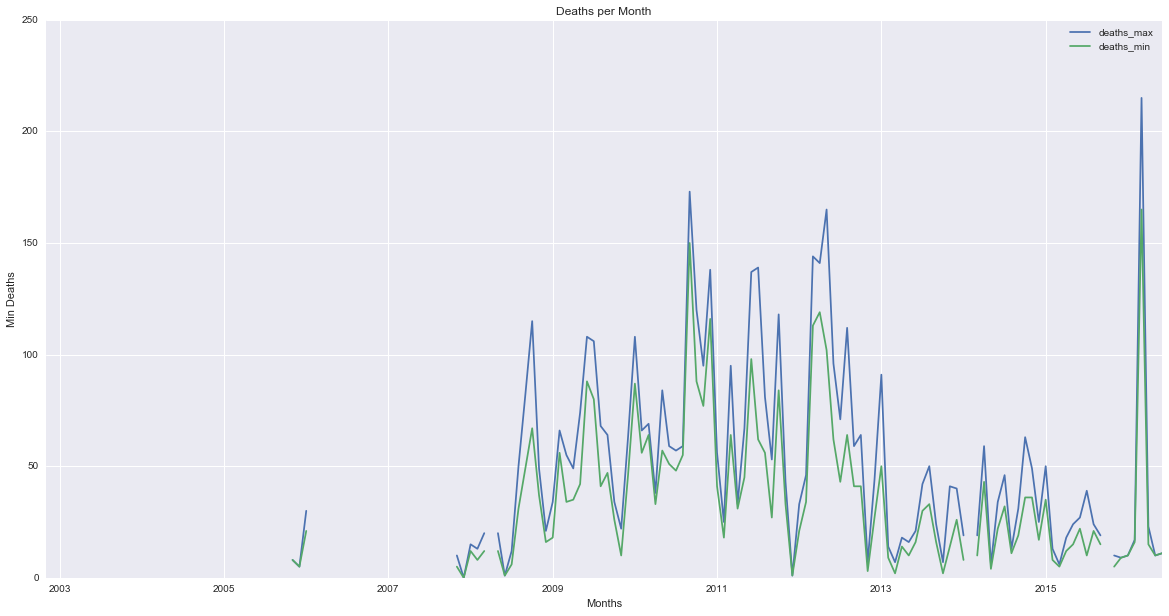

In [361]:
ax = df.resample('m').sum()[['deaths_max']].plot(figsize=(20,10))
df.resample('m').sum()[['deaths_min']].plot(ax=ax)
ax.set_xlabel("Months")
ax.set_ylabel("Min Deaths")
ax.set_title("Deaths per Month")


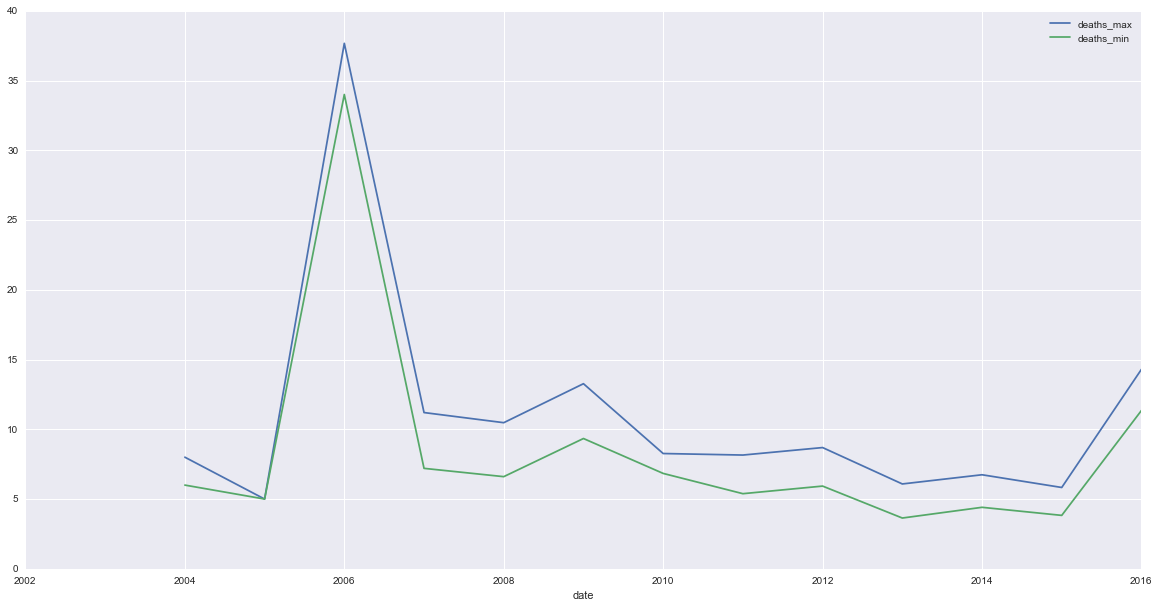

In [352]:
ax = df.resample('A').mean()[['deaths_max']].plot(figsize=(20,10))
df.resample('A').mean()[['deaths_min']].plot(ax=ax)

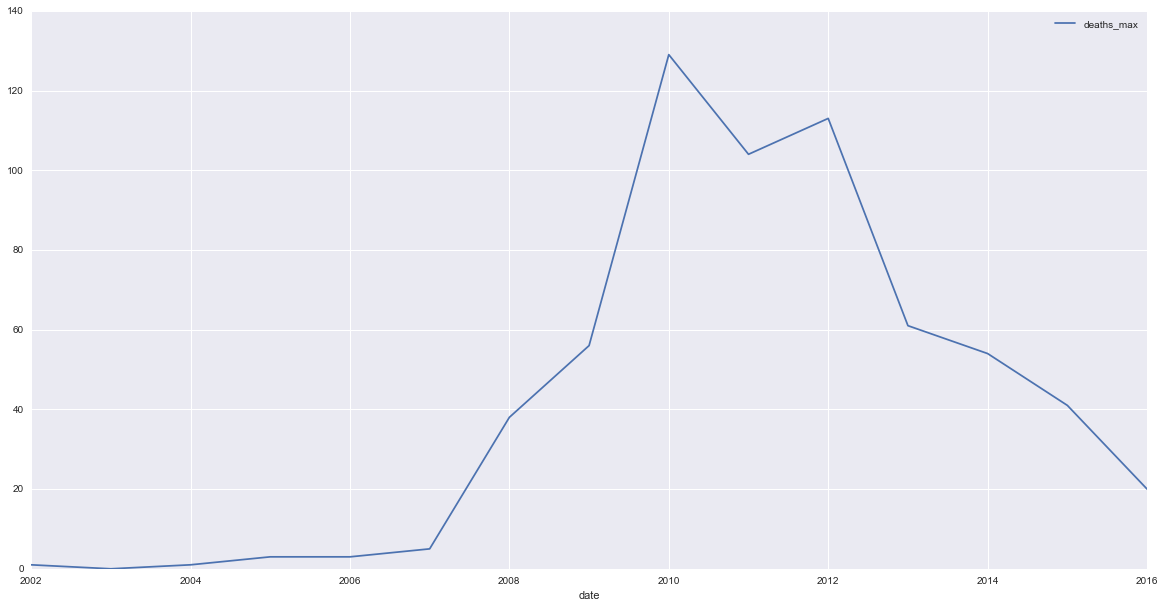

In [353]:
df.resample('A').count()[['deaths_max']].plot(figsize=(20,10))

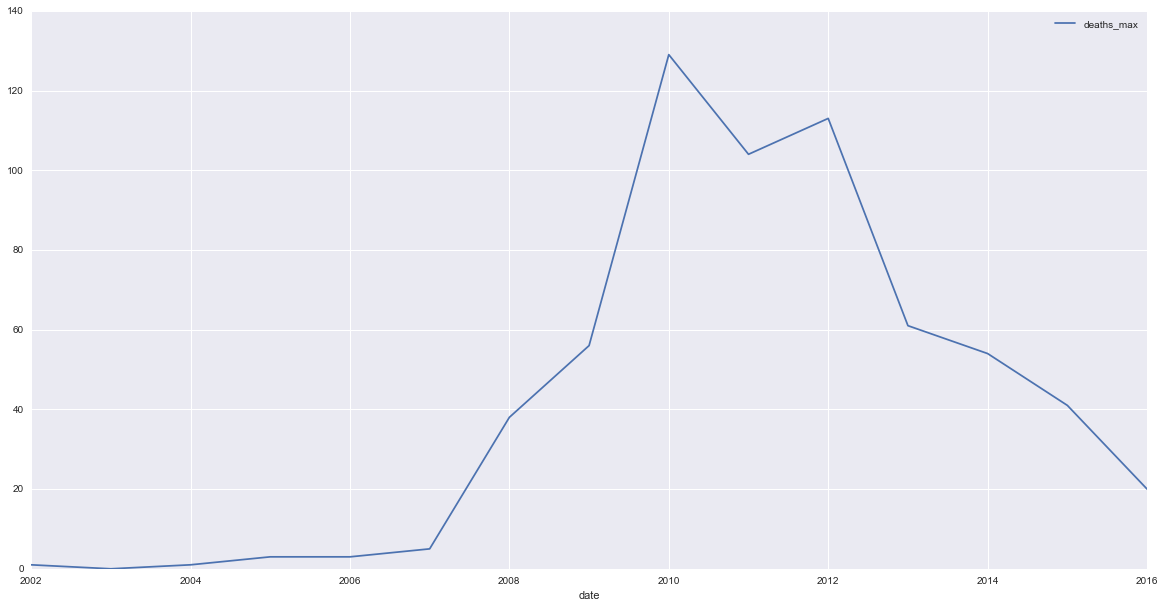

In [354]:

df.resample('A').count()[['deaths_max']].plot(figsize=(20,10))

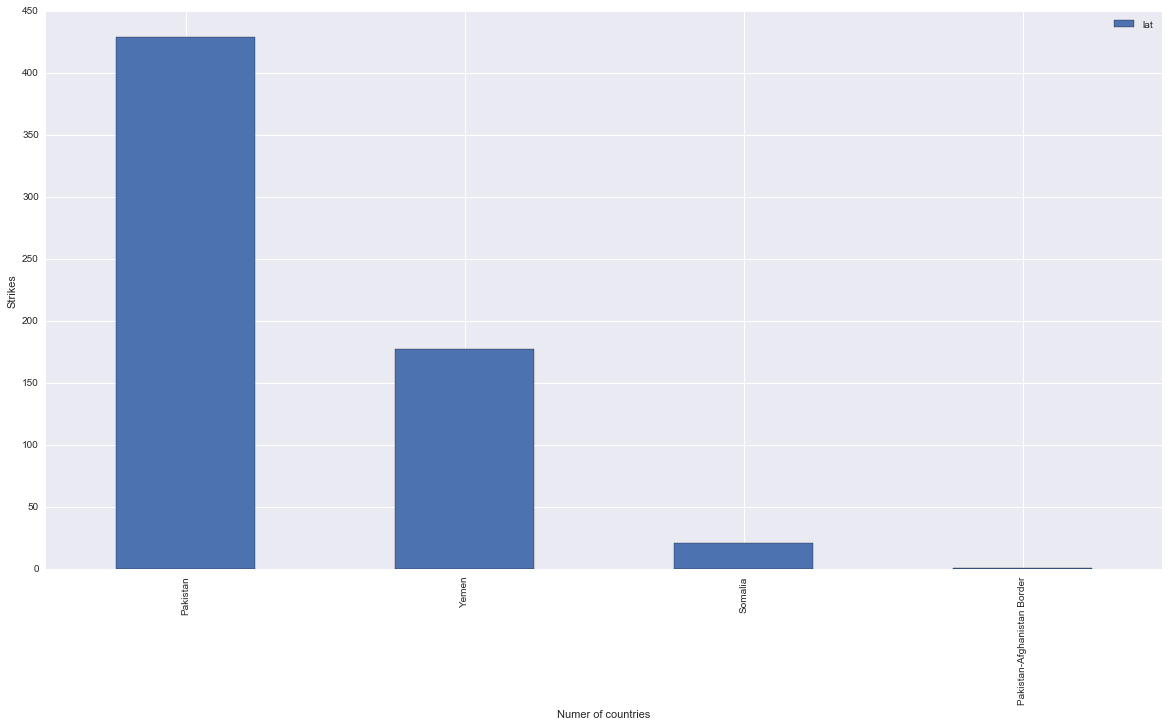

In [355]:
a = df.groupby(by='country').count()[['lat']].sort_values('lat',ascending = False).plot(kind='bar',figsize=(20,10))
a.set_xlabel("Numer of countries")
a.set_ylabel("Strikes")